<h1> Quiz 1 Pemahaman tentang Model Selection</h1>

Jelaskan dengan bahasa kalian sendiri

1. Apa itu Bias dan Variance?
2. Apa itu Overfitting dan Underfitting?
3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model?
4. Bagaimana model yang baik?
5. Kapan kira2 kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?

1. bias adalah error yang terjadi karena model yang terlalu simple dalam mempelajari pola data training sehingga tidak dapat mengikuti pola data secara baik,
    sedangkan variance adalah error yang terjadi karena model yang terlalu kompleks atau terlalu mengikuti pola data training sehingga gagal secara general dalam memprediksi data test

2. overfitting terjadi ketika model menangkap noise dari data atau terlalu memperhatikan data training, sedangkan underfitting terjadi ketika
   model menangkap trend dari data training
3. dengan menyeimbangkan nilai bias dan variance sehingga bisa mendapatkan nilai optimal
4. model yang tiedak underfit dan overfit
5. grid search cv digunakan jika kita menginginkan kombinasi hyperparameter yang relatif sedikit dan menggunakan metode ML yang simpel
    sedangkan randomize digunakan ketika kita mengininkan kombinasi hyperparameter yang relatif banyak dan menggunakan metode ML yang kompleks

<h1> Quiz 2 Praktis Model Selection</h1>

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
2. Gunakan algoritma KNN sebagai model classifier.
3. Gunakan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas
10. Perhatikan bahwa hasil prediksi ada 2, dimana masing2 adalah nilai probabilitas untuk setiap class label. Ambil nilai probabilitas pasien phositive meninggal dalam waktu kurang dari 5 tahun. note : gunakan bantuan attirubte .classes_ untuk mengetahui urutan label dari hasil prediksi probabilitas.
11. Berapa nilai score roc_auc untuk data test?
12. Apakah model anda termasuk baik atau overtting atau underfitting?
13. Ulangi tahap di atas namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
14. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

In [173]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [174]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [175]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

X=df.drop(['survival_status'], axis=1)
y=df['survival_status']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25) #nomor 1
knn=KNeighborsClassifier() #nomor 2
param_gscv={'n_neighbors':np.arange(2,100),'weights':['uniform','distance']}
gscv=GridSearchCV(knn,param_grid=param_gscv,scoring='roc_auc',cv=5,return_train_score=True) #nomor 3,4,5
gscv.fit(X_train,y_train) #nomor 6

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs',

In [176]:
gscv.best_params_ #nomor 7

{'n_neighbors': 55, 'weights': 'uniform'}

In [177]:
gscv.best_score_ #nomor 8

0.7532445495680788

In [178]:
y_predict=gscv.predict_proba(X_test)  #nomor 9

In [179]:
gscv.classes_

array([1, 2], dtype=int64)

In [180]:
df2=pd.DataFrame(y_predict,columns=['class_1','class_2',]) #nomor 10
df2['class_2']

0     0.254545
1     0.218182
2     0.200000
3     0.181818
4     0.145455
        ...   
72    0.200000
73    0.218182
74    0.218182
75    0.200000
76    0.545455
Name: class_2, Length: 77, dtype: float64

In [181]:
ypredict_class=y_predict.argmax(axis=-1)
df_predict=pd.DataFrame(ypredict_class+1)

In [182]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test, df_predict) #nomor 11

0.5301318267419963

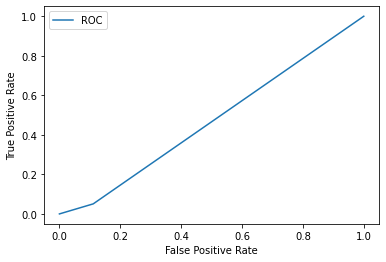

In [183]:
roc_curve(y_test, df_predict,pos_label=1)

import matplotlib.pyplot as plt
a, b, _ = roc_curve(y_test, df_predict,pos_label=1)
plt.plot(a, b, label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

berdasarkan nilai roc auc score didapatkan sebesar 0.6 sehingga termasuk ke dalam model underfitting

In [184]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier() #nomor 2
param_rcv={'max_depth':np.arange(2,100)}
rcv=RandomizedSearchCV(dtc,param_distributions=param_rcv,scoring='roc_auc',cv=5,return_train_score=True)
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [185]:
rcv.best_params_,rcv.best_score_

({'max_depth': 7}, 0.6107568901686549)

In [186]:
if gscv.best_score_ > rcv.best_score_:
    print ("Algoritma kkn terbaik")
else :
    print("Algoritma decision-tree terbaik")

Algoritma kkn terbaik
